<p>Example script to extract daily time serie of the MDFAPAR MSG product for a give lat/lon point and save it in csv format</p>

In [1]:
import datetime as dt 
import thredds_lsasaf_utils as tlu

In [2]:
# Change here your user credentials
server_user="xxx"
server_passwd="xxx"

# Change here the product details 
# Go to https://thredds.lsasvcs.ipma.pt/thredds/catalog/catalog.html
# Navigate selecting satelite, product, format, and data to find the product_path and product file name 
product_path="/MSG/MDFAPAR/NETCDF/"
product_fname="NETCDF4_LSASAF_MSG_FAPAR_MSG-Disk"
NcvarsLoad=['FAPAR'] # list of netcdf variables to load from remote files 
# time period to process 
dstart=dt.datetime(2020,1,1) #start slot 
dend=dt.datetime(2020,12,31)   # end slot 
product_freq="d" 

## Define latitude/longitude point [Lat,lon]
LatLonPoint = [39.3,-0.8] # example for Iberian Peninsula 



In [3]:
# Initialize product details

product = tlu.lsa_product(product_path,product_fname)
product.user = server_user
product.passwd = server_passwd


# list of slots to be processed:
slot_list = tlu.gen_slot_list(dstart,dend,product_freq)
print(f"Will load:{len(slot_list)} files: {slot_list[0]} to {slot_list[-1]}")

# Load data 
ds_full = tlu.load_product_slots_domain(product,slot_list,NcvarsLoad,LatLonPoint=LatLonPoint)


Will load:366 files: 2020-01-01 00:00:00 to 2020-12-31 00:00:00


Processing 2020-12-31 00:00:00: 100%|████████████████████████████████████████████████| 366/366 [01:41<00:00,  3.61it/s]


Loaded 366 out of 366 slots with dims: Frozen({'time': 366}) in 101.68 seconds 


<xarray.Dataset>
Dimensions:  (time: 366)
Coordinates:
    lat      float32 39.3
    lon      float32 -0.8
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    FAPAR    (time) float32 0.3877 0.3996 0.3952 0.3865 ... 0.3786 0.3891 0.3924
Attributes: (12/29)
    references:                      Data provided by the EUMETSAT Satellite ...
    easternmost_longitude:           -80.0
    westernmost_longitude:           80.0
    spatial_resolution:               0.05x 0.05
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_resolution:        0.05
    geospatial_lon_resolution:        0.05
    northernmost_latitude:           80.0
    southernmost_latitude:           -80.0
    DODS.strlen:                     0
    DODS_EXTRA.Unlimited_Dimension:  time

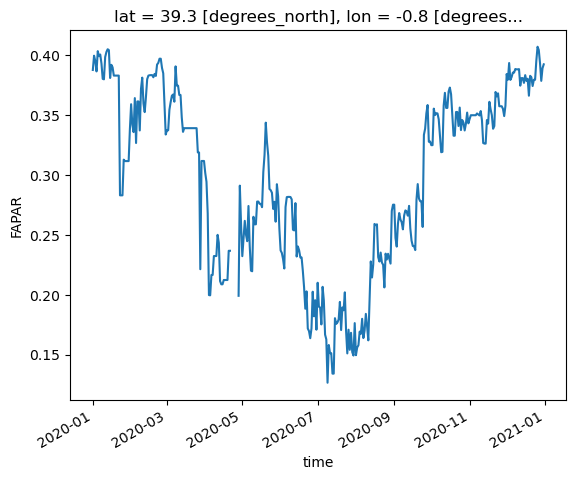

In [4]:
## plot time series 
ds_full['FAPAR'].plot()

In [5]:
## Save to ascii format as csv 
x=ds_full.to_dataframe()[NcvarsLoad[0]]
x.to_csv('tmp.csv')